Mean of Glucose in the sample: 118.36
Maximum Glucose in the sample: 191
Mean of Glucose in the population: 120.89453125
Maximum Glucose in the population: 199


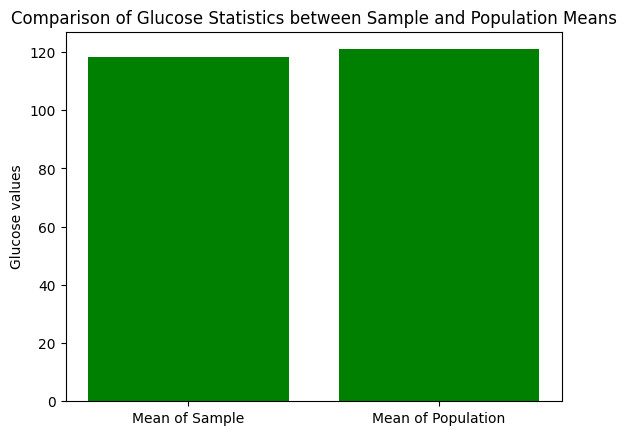

In [3]:
import numpy as np
import pandas as pd
import statistics as st
import random as rd
import matplotlib.pyplot as plt

# Setting seed for reproducibility
np.random.seed(25)

# Reading the diabetes data
diabetes_data = pd.read_csv('/content/diabetes.csv')

# Creating a DataFrame
df = pd.DataFrame(diabetes_data)

# Sampling 25 random rows
sample_data = diabetes_data.sample(n=25, random_state=35)

# Calculating mean of Glucose for the sample
mean_of_glucose_sample = st.mean(sample_data.loc[:, "Glucose"])
print("Mean of Glucose in the sample:", mean_of_glucose_sample)

# Calculating maximum Glucose for the sample
max_of_glucose_sample = max(sample_data.loc[:, "Glucose"])
print("Maximum Glucose in the sample:", max_of_glucose_sample)

# Calculating mean of Glucose for the entire population
mean_of_glucose_population = st.mean(df.loc[:, "Glucose"])
print("Mean of Glucose in the population:", mean_of_glucose_population)

# Calculating maximum Glucose for the entire population
max_of_glucose_population = max(df.loc[:, "Glucose"])
print("Maximum Glucose in the population:", max_of_glucose_population)

# Plotting the bar graph
plt.bar(['Mean of Sample', 'Mean of Population'],
        [mean_of_glucose_sample, mean_of_glucose_population], color='green')
plt.ylabel('Glucose values')
plt.title('Comparison of Glucose Statistics between Sample and Population Means')
plt.show()

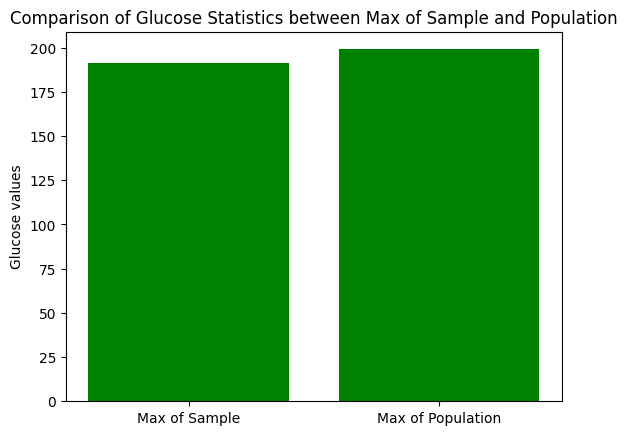

In [2]:
plt.bar(['Max of Sample', 'Max of Population'],
        [max_of_glucose_sample, max_of_glucose_population], color='green')
plt.ylabel('Glucose values')
plt.title('Comparison of Glucose Statistics between Max of Sample and Population')
plt.show()

In [4]:
sample_percentile = np.percentile(sample_data['BMI'], 98)
population_percentile = np.percentile(df['BMI'], 98)

# Printing the percentiles
print("98th percentile of BMI in the sample:", sample_percentile)
print("98th percentile of BMI in the population:", population_percentile)

98th percentile of BMI in the sample: 51.004
98th percentile of BMI in the population: 47.52599999999996


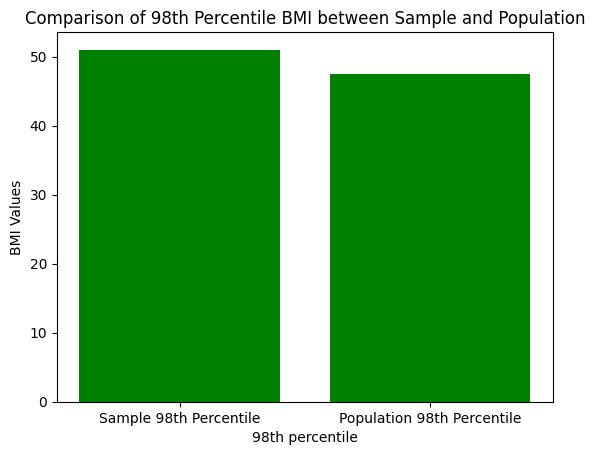

In [5]:
plt.bar(['Sample 98th Percentile', 'Population 98th Percentile'],
        [sample_percentile, population_percentile], color='green')
plt.xlabel('98th percentile')
plt.ylabel('BMI Values')
plt.title('Comparison of 98th Percentile BMI between Sample and Population')
plt.show()

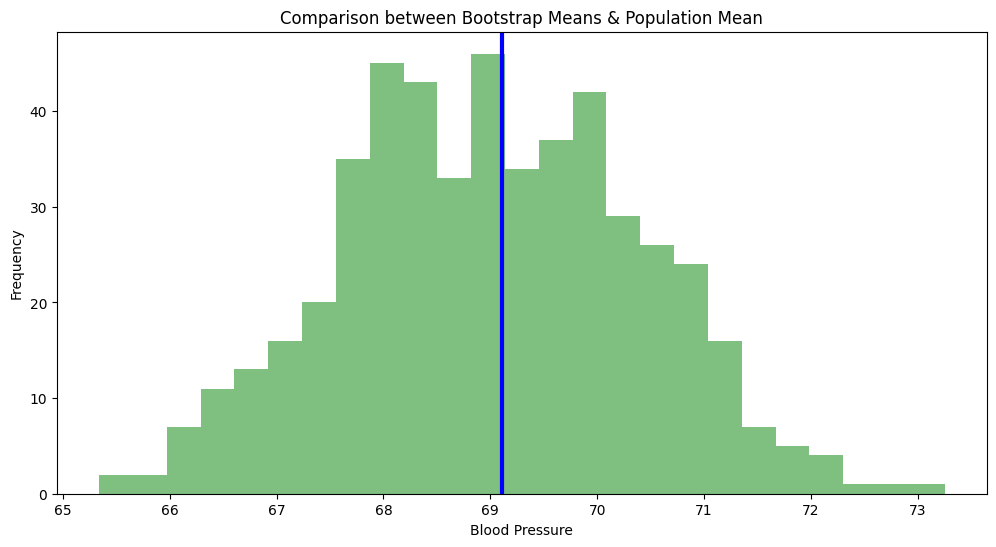

In [7]:
np.random.seed(25)

# Number of bootstrap samples and sample size
no_of_samples = 500
sample_size = 200

# Arrays to store bootstrap statistics
bootstrap_means = np.zeros(no_of_samples)
bootstrap_stds = np.zeros(no_of_samples)
bootstrap_percentiles = np.zeros(no_of_samples)

# Loop for generating bootstrap samples
for i in range(no_of_samples):
    bootstrap_sample = np.random.choice(df['BloodPressure'], size=sample_size, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_stds[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 63)

# Calculating population statistics
population_mean = np.mean(df['BloodPressure'])
population_std = np.std(df['BloodPressure'])
population_percentile = np.percentile(df['BloodPressure'], 63)

# Plotting histogram and vertical line for population mean
plt.figure(figsize=(12, 6))
plt.hist(bootstrap_means, bins=25, color='green', alpha=0.5)
plt.axvline(population_mean, color='blue', linewidth=3)
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Comparison between Bootstrap Means & Population Mean')
plt.show()

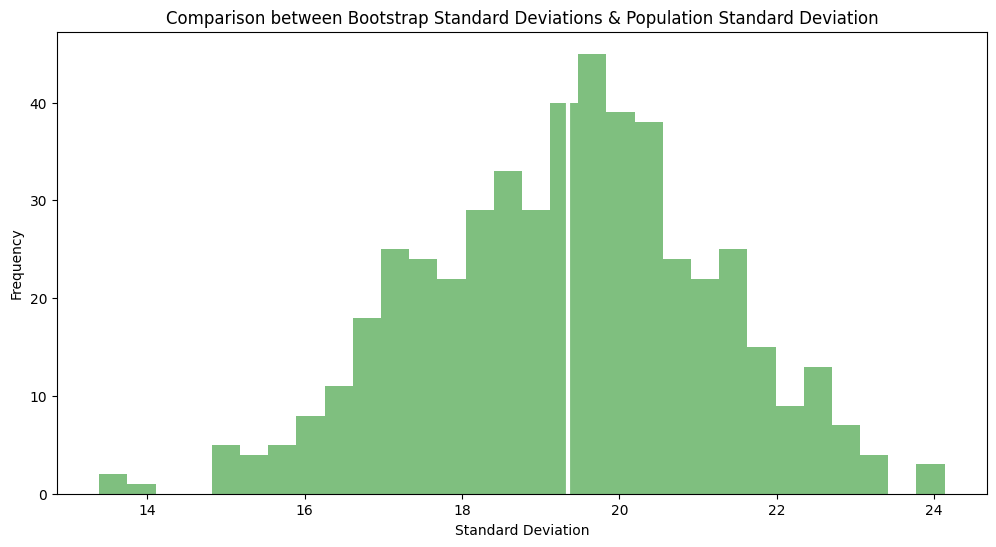

In [8]:
plt.figure(figsize=(12, 6))

# Plotting histogram of bootstrap standard deviations
plt.hist(bootstrap_stds, bins=30, color='green', alpha=0.5)

# Adding a vertical line for population standard deviation
plt.axvline(population_std, color='white', linewidth=3)

# Adding labels and title
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Comparison between Bootstrap Standard Deviations & Population Standard Deviation')

# Displaying the plot
plt.show()

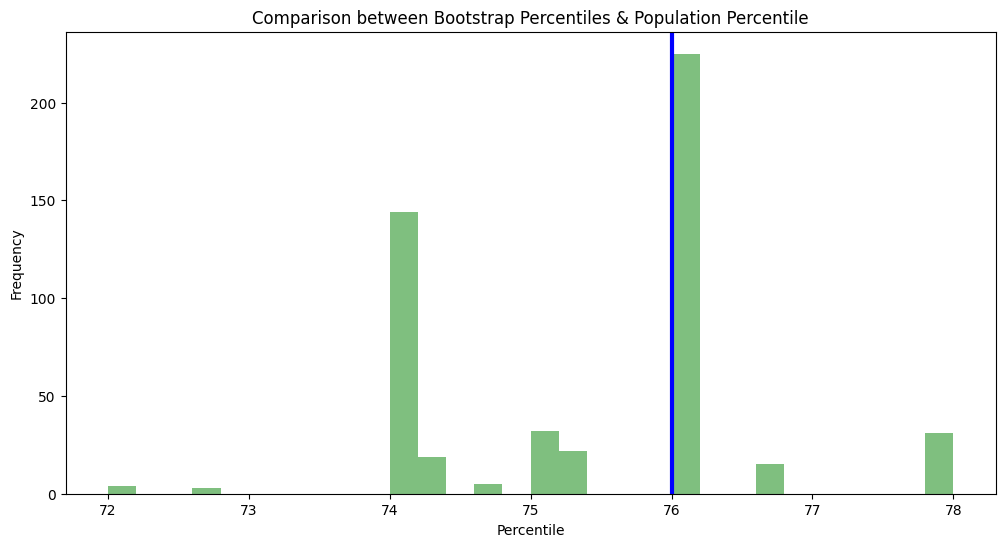

In [9]:
plt.figure(figsize=(12, 6))

# Plotting histogram of bootstrap percentiles
plt.hist(bootstrap_percentiles, bins=30, color='green', alpha=0.5)

# Adding a vertical line for population percentile
plt.axvline(population_percentile, color='blue', linewidth=3)

# Adding labels and title
plt.xlabel('Percentile')
plt.ylabel('Frequency')
plt.title('Comparison between Bootstrap Percentiles & Population Percentile')

# Displaying the plot
plt.show()